# Восстановление золота из золотосодержащей руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# Технологический процесс восстановления золота

**1. Флотация**

Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.<br/><br/>
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).<br/>

**2. Очистка**

Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

**Описание данных**

**Технологический процесс**

- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты:
    - Xanthate,
    - Sulphate,
    - Depressant
- Xanthate — ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

**Параметры этапов**
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

**Наименование признаков**

Наименование признаков должно быть такое:

**[этап].[тип_параметра].[название_параметра]**

Пример: rougher.input.feed_ag

**Возможные значения для блока [этап]:**

- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики


**Возможные значения для блока [тип_параметра]:**

- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

## Подготовка данных

**1.1. Откройте файлы и изучите их.**

In [ ]:
import pandas as pd
import matplotlib.pyplot  as plt
from sklearn.metrics import mean_absolute_error
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import make_pipeline

from sklearn import linear_model
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from sklearn.dummy import DummyRegressor

In [ ]:
data_train = pd.read_csv("/datasets/gold_industry_train.csv")
data_test = pd.read_csv("/datasets/gold_industry_test.csv")
data_real = pd.read_csv("/datasets/gold_industry_full.csv")

Загрузили данные из трех датасетов. Посмотрим, что это за данные.

In [ ]:
#Вывод первых 10 элементов обучающей выборки
data_train.head(10)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686
5,2016-01-15 05:00:00,5.687168,5.801920,1.879351,35.470082,546.173470,57.469578,11.072517,6.200383,999.934134,...,9.302669,41.633678,6.482968,10.049416,5.480257,69.465816,1.918586,10.182708,0.664118,16.999638
6,2016-01-15 06:00:00,6.038436,6.056253,2.105501,34.920570,523.376439,56.674647,11.535899,6.204974,999.832373,...,9.103047,41.995316,6.533849,10.058141,4.569100,69.300835,2.058913,10.304598,0.807342,16.723575
7,2016-01-15 07:00:00,6.433854,5.955053,2.310432,36.091386,549.842749,56.730325,12.557906,6.799275,1000.166602,...,9.369209,42.452727,6.130823,9.935481,4.389813,70.230976,2.143437,10.443288,0.949346,16.689959
8,2016-01-15 08:00:00,6.526612,5.878084,2.391713,35.753879,560.115242,56.649893,13.166128,6.798659,1000.026864,...,9.437044,43.404078,5.834140,10.071156,4.876389,69.688595,2.209881,10.420140,1.065453,17.201948
9,2016-01-15 09:00:00,6.747693,5.974832,2.539114,38.553938,566.616045,60.308763,13.996130,6.800263,1000.332327,...,9.582874,43.487291,5.706261,10.242511,5.214161,70.973641,2.200997,10.473539,1.171183,17.717049


In [ ]:
#Вывод названий столбцов выборки
data_train.columns.tolist()

['date',
 'rougher.input.feed_au',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_sol',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_air',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_au',
 '

In [ ]:
#Вывод общей информации о данных в выборке вместе с занимаемым объемом
data_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [ ]:
#Проверим на наличие пропусков. Пропуски есть.
data_train.isna().sum()

date                       0
rougher.input.feed_au      0
rougher.input.feed_ag      0
rougher.input.feed_pb     72
rougher.input.feed_sol    77
                          ..
final.output.recovery      0
final.output.tail_au       0
final.output.tail_ag       1
final.output.tail_pb      75
final.output.tail_sol      5
Length: 87, dtype: int64

In [ ]:
#Поиск дубликатов. Дубликатов нет
data_train.duplicated().sum()

0

In [ ]:
#Вывод первых 10 пропущенных элементов тестовой выборки
data_test[data_test['rougher.input.feed_pb'].isna()].head(10)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
593,2018-01-14 21:59:59,1.567181,5.754863,NaN,37.923502,510.812634,68.523956,5.005570,4.711896,1197.910761,...,30.022631,-498.727322,22.040393,-499.427831,25.017645,-499.973026,22.984164,-500.164116,24.992154,-499.743822
835,2018-02-02 23:59:59,2.815890,6.128690,NaN,42.448171,533.785976,75.343884,5.004810,4.999046,1201.981142,...,30.016414,-501.072985,19.983553,-500.157182,25.016060,-500.772859,23.009988,-500.119777,24.980096,-500.072790
836,2018-02-03 00:59:59,2.891693,6.211225,NaN,41.966903,583.739319,77.110459,5.000377,5.002892,1198.791879,...,30.012373,-502.142339,19.841365,-501.125175,24.993037,-500.487172,22.979754,-500.007838,24.986214,-500.099652
837,2018-02-03 01:59:59,2.664240,5.862863,NaN,40.464959,568.328803,77.269229,4.996561,5.060176,1201.630075,...,30.015214,-495.662792,20.043123,-498.371977,24.993173,-498.123865,23.004359,-499.672881,24.996677,-498.634913
838,2018-02-03 02:59:59,3.288108,6.372757,NaN,42.545296,579.277726,80.590023,5.203311,5.675847,1204.597354,...,29.987397,-501.051064,19.972289,-499.635388,25.000540,-500.624888,22.975748,-499.913198,24.968321,-499.959513
844,2018-02-03 08:59:59,4.057594,6.510478,NaN,38.381958,561.059826,75.077195,5.005644,5.196432,1194.775195,...,30.005189,-498.668498,19.913505,-499.294871,25.008953,-499.334722,23.010726,-500.093261,25.016404,-500.095148
845,2018-02-03 09:59:59,3.125779,6.308087,NaN,35.711194,560.982586,74.583358,4.995903,5.199000,1200.063962,...,30.022671,-501.999158,19.962413,-500.319286,25.008025,-500.542059,22.997063,-500.040470,24.994111,-500.385286
847,2018-02-03 11:59:59,3.203214,5.909170,NaN,37.894633,564.018230,80.413398,4.996444,5.197157,1198.777615,...,30.006309,-498.218111,19.888326,-499.875033,25.009116,-499.547858,23.025394,-499.976413,24.992912,-499.710579
848,2018-02-03 12:59:59,2.406989,5.727992,NaN,37.010155,559.726403,79.159090,5.002757,5.202703,1204.027938,...,30.012308,-499.484521,19.911201,-500.129941,25.010029,-500.089265,22.997125,-500.141310,25.010350,-500.384210
849,2018-02-03 13:59:59,2.012762,5.924086,NaN,36.353826,559.859454,78.313642,5.001062,5.199816,1201.820029,...,30.032559,-501.116519,19.894668,-500.184107,24.986056,-499.919750,23.008245,-499.880273,24.975394,-499.824020


In [ ]:
#Посмотрим на даты пропусков, может они что-то подскажут
data_test[data_test['rougher.input.feed_pb'].isna()]['date']

593     2018-01-14 21:59:59
835     2018-02-02 23:59:59
836     2018-02-03 00:59:59
837     2018-02-03 01:59:59
838     2018-02-03 02:59:59
844     2018-02-03 08:59:59
845     2018-02-03 09:59:59
847     2018-02-03 11:59:59
848     2018-02-03 12:59:59
849     2018-02-03 13:59:59
850     2018-02-03 14:59:59
851     2018-02-03 15:59:59
852     2018-02-03 16:59:59
853     2018-02-03 17:59:59
854     2018-02-03 18:59:59
855     2018-02-03 19:59:59
856     2018-02-03 20:59:59
857     2018-02-03 21:59:59
858     2018-02-03 22:59:59
859     2018-02-03 23:59:59
860     2018-02-04 00:59:59
861     2018-02-04 01:59:59
862     2018-02-04 02:59:59
863     2018-02-04 03:59:59
864     2018-02-04 04:59:59
890     2018-02-05 07:59:59
4088    2018-07-06 22:59:59
4089    2018-07-06 23:59:59
Name: date, dtype: object

In [ ]:
data_test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [ ]:
data_real.head(10)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686
5,2016-01-15 05:00:00,5.687168,5.801920,1.879351,35.470082,546.173470,57.469578,11.072517,6.200383,999.934134,...,9.302669,41.633678,6.482968,10.049416,5.480257,69.465816,1.918586,10.182708,0.664118,16.999638
6,2016-01-15 06:00:00,6.038436,6.056253,2.105501,34.920570,523.376439,56.674647,11.535899,6.204974,999.832373,...,9.103047,41.995316,6.533849,10.058141,4.569100,69.300835,2.058913,10.304598,0.807342,16.723575
7,2016-01-15 07:00:00,6.433854,5.955053,2.310432,36.091386,549.842749,56.730325,12.557906,6.799275,1000.166602,...,9.369209,42.452727,6.130823,9.935481,4.389813,70.230976,2.143437,10.443288,0.949346,16.689959
8,2016-01-15 08:00:00,6.526612,5.878084,2.391713,35.753879,560.115242,56.649893,13.166128,6.798659,1000.026864,...,9.437044,43.404078,5.834140,10.071156,4.876389,69.688595,2.209881,10.420140,1.065453,17.201948
9,2016-01-15 09:00:00,6.747693,5.974832,2.539114,38.553938,566.616045,60.308763,13.996130,6.800263,1000.332327,...,9.582874,43.487291,5.706261,10.242511,5.214161,70.973641,2.200997,10.473539,1.171183,17.717049


In [ ]:
data_real.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


In [ ]:
data_real.isna().sum()

date                        0
rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb     100
rougher.input.feed_sol     99
                         ... 
final.output.recovery       0
final.output.tail_au        0
final.output.tail_ag        1
final.output.tail_pb      101
final.output.tail_sol       6
Length: 87, dtype: int64

In [ ]:
data_real[data_real['rougher.input.feed_pb'].isna()].head(10)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
262,2016-01-27 14:00:00,3.514019,7.504396,NaN,29.200848,202.024295,60.125904,4.500554,2.616880,1000.752695,...,2.088724,40.328310,9.292335,8.603079,NaN,40.604484,2.163724,11.107299,0.340029,5.535904
354,2016-02-01 04:00:00,4.155161,8.782859,NaN,NaN,411.555909,36.936359,6.966367,5.552877,1000.501509,...,9.624694,44.654136,5.637249,9.405023,0.911648,42.357525,2.493415,11.555843,1.498860,11.246721
760,2016-02-18 22:00:00,3.682222,7.146042,NaN,29.748334,477.952640,54.936135,6.016813,3.638118,991.691682,...,9.869267,31.183485,3.253537,7.229496,5.910253,68.950557,1.244647,8.182029,NaN,6.746923
761,2016-02-18 23:00:00,4.478027,7.888903,NaN,33.534971,492.788388,54.891904,5.501627,3.220578,990.982997,...,10.580796,46.534848,4.242921,10.294672,7.586523,62.388421,1.791831,10.674696,NaN,9.679080
852,2016-02-22 22:00:00,3.691317,7.551066,NaN,NaN,489.383457,49.991229,4.785527,3.095143,989.995014,...,11.445213,41.755563,4.643427,11.799903,7.532330,29.387374,2.676058,10.644910,1.278552,13.509223
918,2016-02-25 16:00:00,2.106483,7.846996,NaN,NaN,213.827893,44.402832,6.447446,4.041024,1000.711633,...,0.000000,43.121872,4.978376,10.380017,NaN,15.887114,1.785682,10.137380,0.870445,17.765880
919,2016-02-25 17:00:00,2.628128,7.566549,NaN,NaN,179.425096,61.097736,4.003762,2.496125,1000.079060,...,5.958196,41.506126,7.449749,7.814327,NaN,5.813479,2.484487,11.656130,1.246949,3.811963
1175,2016-03-10 16:00:00,5.204188,6.287612,NaN,26.950710,449.065692,47.160965,8.994607,5.996812,998.952149,...,11.118625,47.293059,5.456930,8.554733,NaN,41.614843,3.184293,10.761689,1.404221,15.087121
1246,2016-03-13 15:00:00,3.048159,7.480951,NaN,NaN,176.819859,55.244951,3.996756,2.495699,1000.680318,...,NaN,43.050052,9.943401,7.542210,NaN,5.982863,2.877984,11.186132,1.037645,4.265981
13301,2017-10-15 03:59:59,2.450551,6.648316,NaN,41.739046,574.378897,56.502525,5.053696,5.498925,1201.251521,...,NaN,43.799048,5.936281,10.628963,8.094710,42.942625,1.432641,9.324558,0.987726,9.450270


In [ ]:
data_real[data_real['rougher.input.feed_pb'].isna()]['date']

262      2016-01-27 14:00:00
354      2016-02-01 04:00:00
760      2016-02-18 22:00:00
761      2016-02-18 23:00:00
852      2016-02-22 22:00:00
                ...         
15442    2018-02-04 03:59:59
15443    2018-02-04 04:59:59
15469    2018-02-05 07:59:59
18667    2018-07-06 22:59:59
18668    2018-07-06 23:59:59
Name: date, Length: 100, dtype: object

In [ ]:
data_real[data_real['rougher.input.feed_sol'].isna()]['date']

38       2016-01-16 14:00:00
82       2016-01-18 12:00:00
84       2016-01-18 14:00:00
216      2016-01-25 16:00:00
354      2016-02-01 04:00:00
                ...         
18324    2018-06-19 18:59:59
18781    2018-07-12 00:59:59
18808    2018-07-13 03:59:59
18896    2018-07-17 02:59:59
19315    2018-08-13 02:59:59
Name: date, Length: 99, dtype: object

In [ ]:
data_real.duplicated().sum()

0

In [ ]:
# Размерность таблиц
print(data_real.shape, data_train.shape, data_test.shape)

(19439, 87) (14579, 87) (4860, 53)


**Тестовый набор данных содержит значительно меньше столбцов - разница в 34 столбца. Выискивать из глазами совсем неудобно. Пройдемся в цикле по обучающей выборке по названию столбцов и найдем те, которые отсутствуют в тестовой выборке. Можно предположить, то это данные, касающиеся выходных значений. Которые модель должна предсказать.**

In [ ]:
# Определим, какие столбцы отсутствуют в тестовом датасете.
count = 0
for item in data_train.columns.unique():
    if item not in data_test.columns.unique():
        count += 1
        print(count, item)
print('\n', count, 'столбца отсутствует в сравнении с тренировочной выборкой ')

1 rougher.calculation.sulfate_to_au_concentrate
2 rougher.calculation.floatbank10_sulfate_to_au_feed
3 rougher.calculation.floatbank11_sulfate_to_au_feed
4 rougher.calculation.au_pb_ratio
5 rougher.output.concentrate_au
6 rougher.output.concentrate_ag
7 rougher.output.concentrate_pb
8 rougher.output.concentrate_sol
9 rougher.output.recovery
10 rougher.output.tail_au
11 rougher.output.tail_ag
12 rougher.output.tail_pb
13 rougher.output.tail_sol
14 primary_cleaner.output.concentrate_au
15 primary_cleaner.output.concentrate_ag
16 primary_cleaner.output.concentrate_pb
17 primary_cleaner.output.concentrate_sol
18 primary_cleaner.output.tail_au
19 primary_cleaner.output.tail_ag
20 primary_cleaner.output.tail_pb
21 primary_cleaner.output.tail_sol
22 secondary_cleaner.output.tail_au
23 secondary_cleaner.output.tail_ag
24 secondary_cleaner.output.tail_pb
25 secondary_cleaner.output.tail_sol
26 final.output.concentrate_au
27 final.output.concentrate_ag
28 final.output.concentrate_pb
29 final.out

In [ ]:
data_real.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,...,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000
mean,8.266097,8.794927,3.598085,36.695114,478.320042,58.970310,12.334373,6.021474,1105.315068,-376.610690,...,7.167247,44.076513,5.168470,9.978895,9.501224,67.050208,3.042467,9.688589,2.705795,10.583728
std,1.955092,1.936847,1.049486,5.145445,105.373758,21.634478,3.427317,1.127263,160.826798,93.909667,...,3.916079,5.129784,1.372348,1.669240,2.787537,10.125840,0.922808,2.328642,0.949077,2.868782
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.046369,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.854384,7.237967,2.887280,34.207799,416.525453,47.435103,10.000362,5.398678,999.661867,-499.835165,...,3.845475,43.402215,4.251240,9.137262,7.722820,63.299712,2.461138,8.062878,2.040119,8.938947
50%,8.125839,8.593574,3.534895,37.202650,499.416120,54.610197,12.001174,6.008273,1001.072890,-300.263994,...,7.685827,45.011244,5.066094,10.102433,9.218961,68.172738,2.984909,9.743623,2.748730,10.622456
75%,9.769917,10.213771,4.244161,40.039133,550.172183,65.023044,14.716595,6.798051,1205.620588,-299.981998,...,10.411296,46.275313,5.895527,11.035769,10.947813,72.686642,3.571351,11.134294,3.333216,12.104271
max,13.731330,14.596026,7.142594,53.477742,717.508837,484.967466,36.118275,9.703448,1521.980372,-273.776101,...,26.000772,52.756638,16.001945,17.031899,19.615720,100.000000,8.245022,19.552149,5.804178,22.317730


**1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.**

Проверим формулу: ![image.png](attachment:image.png)

- data_train['rougher.output.concentrate_au'] - C — доля золота в концентрате после флотации/очистки;
- data_train['rougher.input.feed_au'] - F — доля золота в сырье/концентрате до флотации/очистки;
- data_train['rougher.output.tail_au'] - T — доля золота в отвальных хвостах после флотации/очистки.



In [ ]:
a = data_train['rougher.output.concentrate_au'] * (data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au'])
b = (data_train['rougher.input.feed_au'] * (data_train['rougher.output.concentrate_au'] - data_train['rougher.output.tail_au']))
Recovery = (a / b) * 100

In [ ]:
#Выведем первые 20 рассчитанных значений и значений признака rougher.output.recovery
print("Рассчитанные\t\t", "rougher.output.recovery\n")
for i in range(20):
    print(Recovery[i], '\t', data_train['rougher.output.recovery'][i])

Рассчитанные		 rougher.output.recovery

87.10776292825425 	 87.10776292825425
86.84326050586625 	 86.84326050586624
86.84230825746626 	 86.84230825746624
87.22642953304764 	 87.22642953304764
86.68879413602453 	 86.68879413602453
88.15691183260716 	 88.15691183260715
88.1680653345177 	 88.16806533451772
87.66833564149847 	 87.66833564149847
87.03586230135835 	 87.03586230135834
88.28069949176967 	 88.2806994917697
88.49911737941176 	 88.49911737941177
89.51970137744689 	 89.51970137744689
85.1362942201115 	 85.13629422011151
86.48982729445996 	 86.48982729445996
86.24179487081707 	 86.24179487081707
86.58257785754911 	 86.58257785754914
86.82411855923712 	 86.82411855923709
88.1322394406157 	 88.1322394406157
85.91049781625505 	 85.91049781625506
86.26237747686008 	 86.26237747686007


**Сравним данные, полученные по формуле с данными из обучающей выборки.**

In [ ]:
for i in range(len(Recovery)):
    if (Recovery[i] - data_train['rougher.output.recovery'][i])>0.0000000000001:
        print(Recovery[i], data_train['rougher.output.recovery'][i], Recovery[i] - data_train['rougher.output.recovery'][i])

**Полное совпадение до 13 знаков после запятой. Вывод: формула эффективности обогащения рассчитана правильно.**

**Найдем MAE между полученными расчётами и значениями признака.**


In [ ]:
s = 0
for i in range(len(Recovery)):
    s += abs(data_train['rougher.output.recovery'][i] - Recovery[i])
mae = s / len(Recovery)
mae

9.83758577644259e-15

**MAE -  предельно низко. Что говорит о том, что средняя абсолютная разница между прогнозируемыми значениями и фактическими значениями в наборе данных предельно мала. Делаем вывод, что модель соответствует набору данных. Формулу можно использовать**

**1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?**


Так как тестовая выборка имитирует работу модели в реальных условиях протекания технологического процесса, то можно предположить, что некоторые признаки заранее не могут быть известны, потому что замеряются и/или рассчитываются значительно позже.   
    
В тестовой выборке отсутствуют 4 признака этапа флотации - расчетные характеристики исходного сырья.

Девять признаков этапа флотации относящиеся к характеристикам концентрации веществ во время флотации и отвальных хвостах.

8 Признаков – первичная очистка, концентрация веществ после первичной очистки и отвальных хвостах.

4 признака – концентрация веществ в отвальных хвостах во время вторичной очистки
9 признаков – признаки обогащения и отвальных хвостах на финальном этапе



**1.4. Проведите предобработку данных.**

Выполним предобработку данных.
  - устраним пропуски
  - проверим данные на аномалии

In [ ]:
data_real.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [ ]:
#Заполним пропуски соседними значениями
data_real = data_real.fillna(method='ffill')
data_train=data_train.fillna(method='ffill')
data_test = data_test.fillna(method='ffill')


Стратегия заполнения пропусков - значением предыдущей даты, выбрана исходя из описания технического задания к проекту, где сказано, что "Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи."


In [ ]:
data_train.isna().sum()

date                      0
rougher.input.feed_au     0
rougher.input.feed_ag     0
rougher.input.feed_pb     0
rougher.input.feed_sol    0
                         ..
final.output.recovery     0
final.output.tail_au      0
final.output.tail_ag      0
final.output.tail_pb      0
final.output.tail_sol     0
Length: 87, dtype: int64

In [ ]:
# data_real['date'].hist(bins = 100,figsize=(15,15));

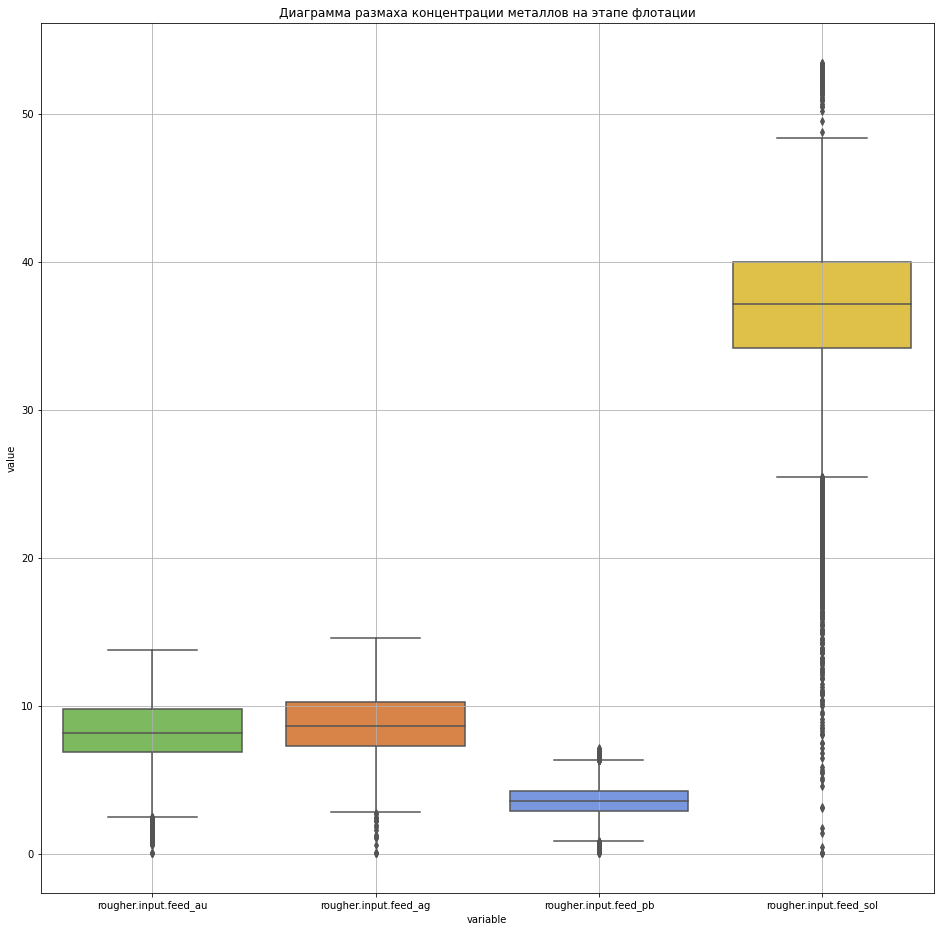

In [ ]:
colors = ['#78C850', '#F08030', '#6890F0','#F8D030', '#F85888', '#705898', '#98D8D8']
plt.figure(figsize=(16,16))
grid=True
df = pd.DataFrame(data=data_real, columns=['rougher.input.feed_au',  'rougher.input.feed_ag',  'rougher.input.feed_pb', \
                                           'rougher.input.feed_sol'])
sns.boxplot(x="variable", y="value", data=pd.melt(df), palette=colors)\
.set_title("Диаграмма размаха концентрации металлов на этапе флотации");
plt.grid(True);

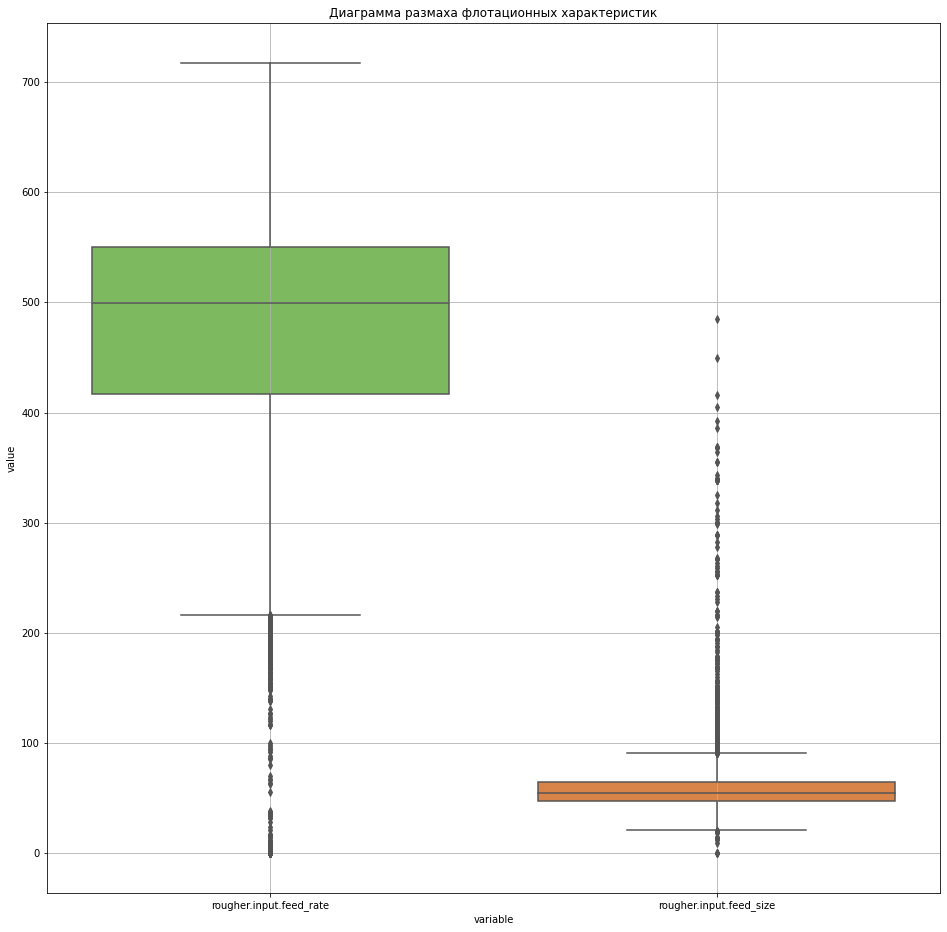

In [ ]:
colors = ['#78C850', '#F08030', '#6890F0','#F8D030', '#F85888', '#705898', '#98D8D8']
plt.figure(figsize=(16,16))
df = pd.DataFrame(data=data_real, columns=['rougher.input.feed_rate', 'rougher.input.feed_size'])
sns.boxplot(x="variable", y="value", data=pd.melt(df), palette=colors).set_title("Диаграмма размаха флотационных характеристик");
plt.grid(True);

In [ ]:
lst = ['rougher.input.feed_au',  'rougher.input.feed_ag',  'rougher.input.feed_pb', 'rougher.input.feed_sol',\
       'rougher.input.feed_rate', 'rougher.input.feed_size']
for item in lst:
    print(item)
    print(data_real[item].describe())

rougher.input.feed_au
count    19439.000000
mean         8.266097
std          1.955092
min          0.010000
25%          6.854384
50%          8.125839
75%          9.769917
max         13.731330
Name: rougher.input.feed_au, dtype: float64
rougher.input.feed_ag
count    19439.000000
mean         8.794927
std          1.936847
min          0.010000
25%          7.237967
50%          8.593574
75%         10.213771
max         14.596026
Name: rougher.input.feed_ag, dtype: float64
rougher.input.feed_pb
count    19439.000000
mean         3.584516
std          1.064760
min          0.010000
25%          2.872178
50%          3.528235
75%          4.241005
max          7.142594
Name: rougher.input.feed_pb, dtype: float64
rougher.input.feed_sol
count    19439.000000
mean        36.676689
std          5.160229
min          0.010000
25%         34.197313
50%         37.189485
75%         40.026614
max         53.477742
Name: rougher.input.feed_sol, dtype: float64
rougher.input.feed_rate
count 

Размах в данных показывает, что есть выбросы. Есть данные, близкие к нулю, которые являются выбросами. Их можно удалить.

Итак. На первом этапе данные были проанализированы. Сделаны следующие выводы:
- Три датасета.
- Размерность трех датафреймов:
        - исходный -(19439, 87)
        - тренировочный - (14579, 87)
        - тестовый - (4860, 53).
- Тестовая выборка содержит на 34 столбца меньше чем две другие таблицы.
- В тестовой выборке отсутствуют данные, касающиеся выходных значений, которые будут получены в ходе выполнения технологического процесса. Поэтому, тестовую и тренировочную выборки создадим заново из исходной.
- В данных присутствуют пропуски. - Выберем стратегию заполнения пропусков. Большое количество пропусков в один день - различие по времени, стоит посмотреть на значения тех же признаков по соседним датам. Заполним значением предыдущей даты.
- **Пропущенные значения логично заполнить значением предыдущей даты, так как в описании технического задания к проекту сказано, что "Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи."**
- Явных дубликатов нет
- Типы данных в норме, дату - выбросить из признаков.
- все значения количественные - юудем использовать модеи регрессии
- Размах в данных показывает, что есть выбросы. Есть данные, близкие к нулю, которые являются выбросами. Их можно удалить.
- Проверена формула эффективности обогащения. Найдено полное совпадение значений до 13 знаков после запятой. MAE - предельно низко. Что говорит о том, что средняя абсолютная разница между прогнозируемыми значениями и фактическими значениями в наборе данных предельно мала. Делаем вывод, что модель соответствует набору данных. Формулу можно использовать.



## Анализ данных

**2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Какие особенности имеют распределения? Опишите выводы.**

In [ ]:
col_input=['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']
col_outp = ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']
col_primary = ['primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag',\
               'primary_cleaner.output.concentrate_pb']
col_final = ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']

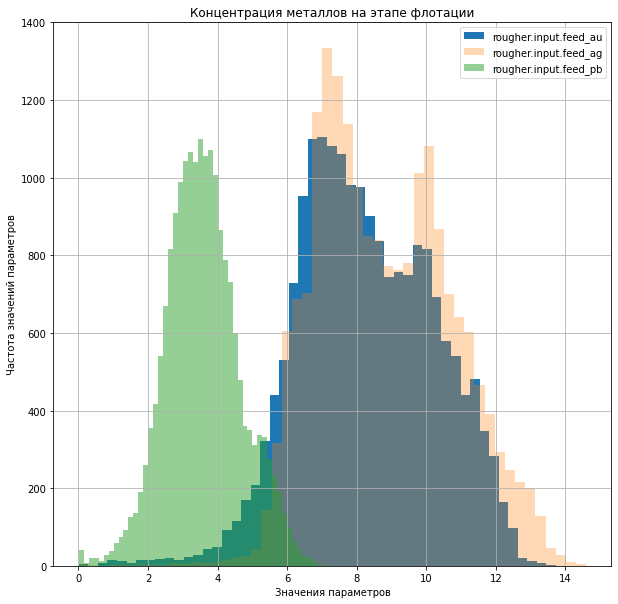

In [ ]:
data_real['rougher.input.feed_au'].hist(bins=50, figsize=(10,10), legend='Золото');
data_real['rougher.input.feed_ag'].hist(bins=50, figsize=(10,10),alpha = 0.3, legend='Серебро');
data_real['rougher.input.feed_pb'].hist(bins=50, figsize=(10,10),alpha = 0.5, legend='Свинец');
plt.title("Концентрация металлов на этапе флотации");
plt.ylabel('Частота значений параметров');
plt.xlabel("Значения параметров");

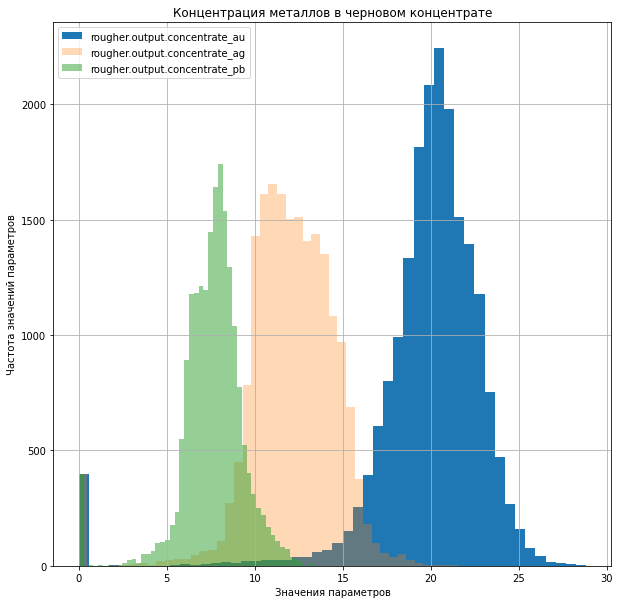

In [ ]:
data_real['rougher.output.concentrate_au'].hist(bins=50, figsize=(10,10), legend='Золото');
data_real['rougher.output.concentrate_ag'].hist(bins=50, figsize=(10,10),alpha = 0.3, legend='Серебро');
data_real['rougher.output.concentrate_pb'].hist(bins=50, figsize=(10,10),alpha = 0.5, legend='Свинец');
plt.title("Концентрация металлов в черновом концентрате");
plt.ylabel('Частота значений параметров');
plt.xlabel("Значения параметров");

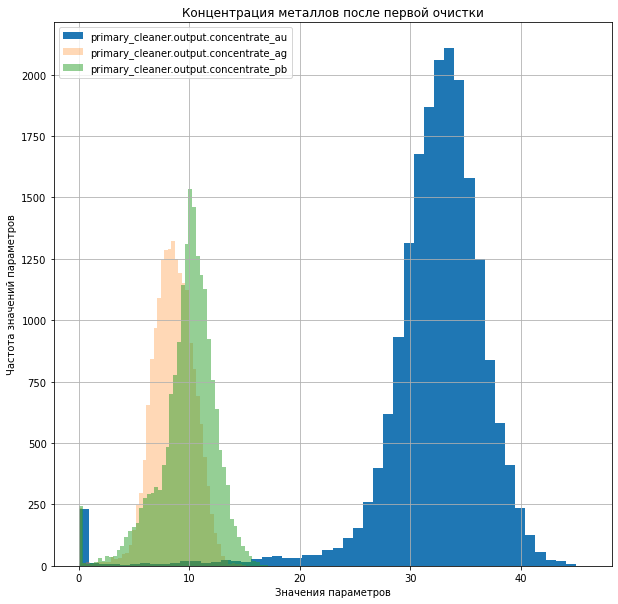

In [ ]:
data_real['primary_cleaner.output.concentrate_au'].hist(bins=50, figsize=(10,10), legend='Золото');
data_real['primary_cleaner.output.concentrate_ag'].hist(bins=50, figsize=(10,10),alpha = 0.3, legend='Серебро');
data_real['primary_cleaner.output.concentrate_pb'].hist(bins=50, figsize=(10,10),alpha = 0.5, legend='Свинец');
plt.title("Концентрация металлов после первой очистки");
plt.ylabel('Частота значений параметров');
plt.xlabel("Значения параметров");

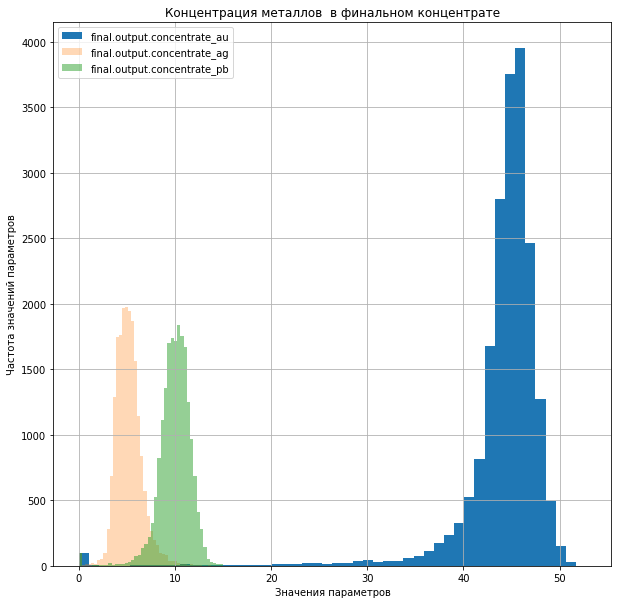

In [ ]:
data_real['final.output.concentrate_au'].hist(bins=50, figsize=(10,10), legend='Золото');
data_real['final.output.concentrate_ag'].hist(bins=50, figsize=(10,10),alpha = 0.3, legend='Серебро');
data_real['final.output.concentrate_pb'].hist(bins=50, figsize=(10,10),alpha = 0.5, legend='Свинец');
plt.title("Концентрация металлов  в финальном концентрате");
plt.ylabel('Частота значений параметров');
plt.xlabel("Значения параметров");

На графиках прекрасно отслеживается процесс роста концентрации золота от этапа к этапу. Рассчитаем количественные значения изменения концентрации золота на разных этапах, подтвердим визуальное представление расчетными значениями.

In [ ]:
def pprint_concenr(col):
    for item in col:
        print(round(data_real[item].mean(),3), end='\t')

In [ ]:
print("Концентрация металлов (Au, Ag, Pb)")
print("до флотации \nЗолото  Серебро  Свинец")
pprint_concenr(col_input)
print("\n\nпосле флотации \nЗолото  Серебро  Свинец")
pprint_concenr(col_outp)
print("\n\nпосле первичной обработки \nЗолото  Серебро  Свинец")
pprint_concenr(col_primary)
print("\n\nпосле вторичной обработки \nЗолото  Серебро  Свинец")
pprint_concenr(col_final )

Концентрация металлов (Au, Ag, Pb)
до флотации 
Золото  Серебро  Свинец
8.266	8.795	3.585	

после флотации 
Золото  Серебро  Свинец
19.772	11.995	7.606	

после первичной обработки 
Золото  Серебро  Свинец
32.119	8.442	9.809	

после вторичной обработки 
Золото  Серебро  Свинец
44.077	5.168	9.979	

Концентрация золота растет с каждым этапом. После вторичной обработки его содержание увеличивается более чем в 5 раз. Содержание серебра увеличивается после флотации, затем снижается. К финальному этапу содержание серебра меньше чем в начале в полтора раза. Концентрация свинца растет от этапа к этапу. К финальному этапу содержание свинца увеличивается втрое.

Таким образом,
- содержание золота в финальном концентрате увеличивается более чем в пять раз по сравнению с его содержанием в сырье.
- Уже после флотации  концентрация золота вырастает в 2,4 раза.
- После первой очистки - увеличивается  в 1,5 раза.
- К финальному этапу концентрация увеличивается в 5,4 раз.


На всех графиках видно, что есть некоторые  значения возле нуля. Это выглядит весьма странно. Помня также, о том что диаграмма размаха показала выбросы около нуля, возможно это они как раз и есть. Избавимся от них.


In [ ]:
columns=['rougher.input.feed_au',  'rougher.input.feed_ag',  'rougher.input.feed_pb', 'rougher.input.feed_sol',\
        'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.output.concentrate_au', \
         'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb','primary_cleaner.output.concentrate_au',\
         'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_au', \
         'final.output.concentrate_ag', 'final.output.concentrate_pb']

for item in columns:
    print(item, data_train[data_train[item] < 1][item].count())

rougher.input.feed_au 17
rougher.input.feed_ag 4
rougher.input.feed_pb 102
rougher.input.feed_sol 4
rougher.input.feed_rate 35
rougher.input.feed_size 3
rougher.output.concentrate_au 398
rougher.output.concentrate_ag 399
rougher.output.concentrate_pb 401
primary_cleaner.output.concentrate_au 214
primary_cleaner.output.concentrate_ag 239
primary_cleaner.output.concentrate_pb 242
final.output.concentrate_au 100
final.output.concentrate_ag 117
final.output.concentrate_pb 103


In [ ]:
for item in columns:
    data_train = data_train.drop(data_train[data_train[item]==0].index)

data_train.shape

(13982, 87)

In [ ]:
14578 - 13982

596

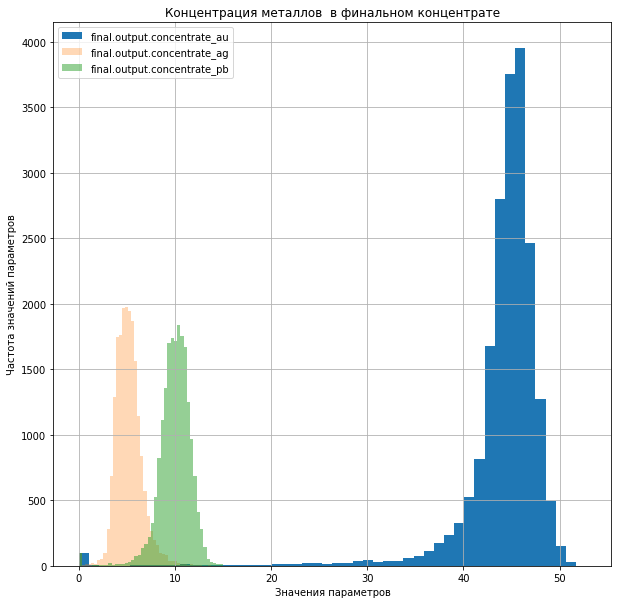

In [ ]:
data_real['final.output.concentrate_au'].hist(bins=50, figsize=(10,10), legend='Золото');
data_real['final.output.concentrate_ag'].hist(bins=50, figsize=(10,10),alpha = 0.3, legend='Серебро');
data_real['final.output.concentrate_pb'].hist(bins=50, figsize=(10,10),alpha = 0.5, legend='Свинец');
plt.title("Концентрация металлов  в финальном концентрате");
plt.ylabel('Частота значений параметров');
plt.xlabel("Значения параметров");

Логичнее было бы построить графики концентрации каждого металла на разных этапах.

**2.2.  Сравните распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.**

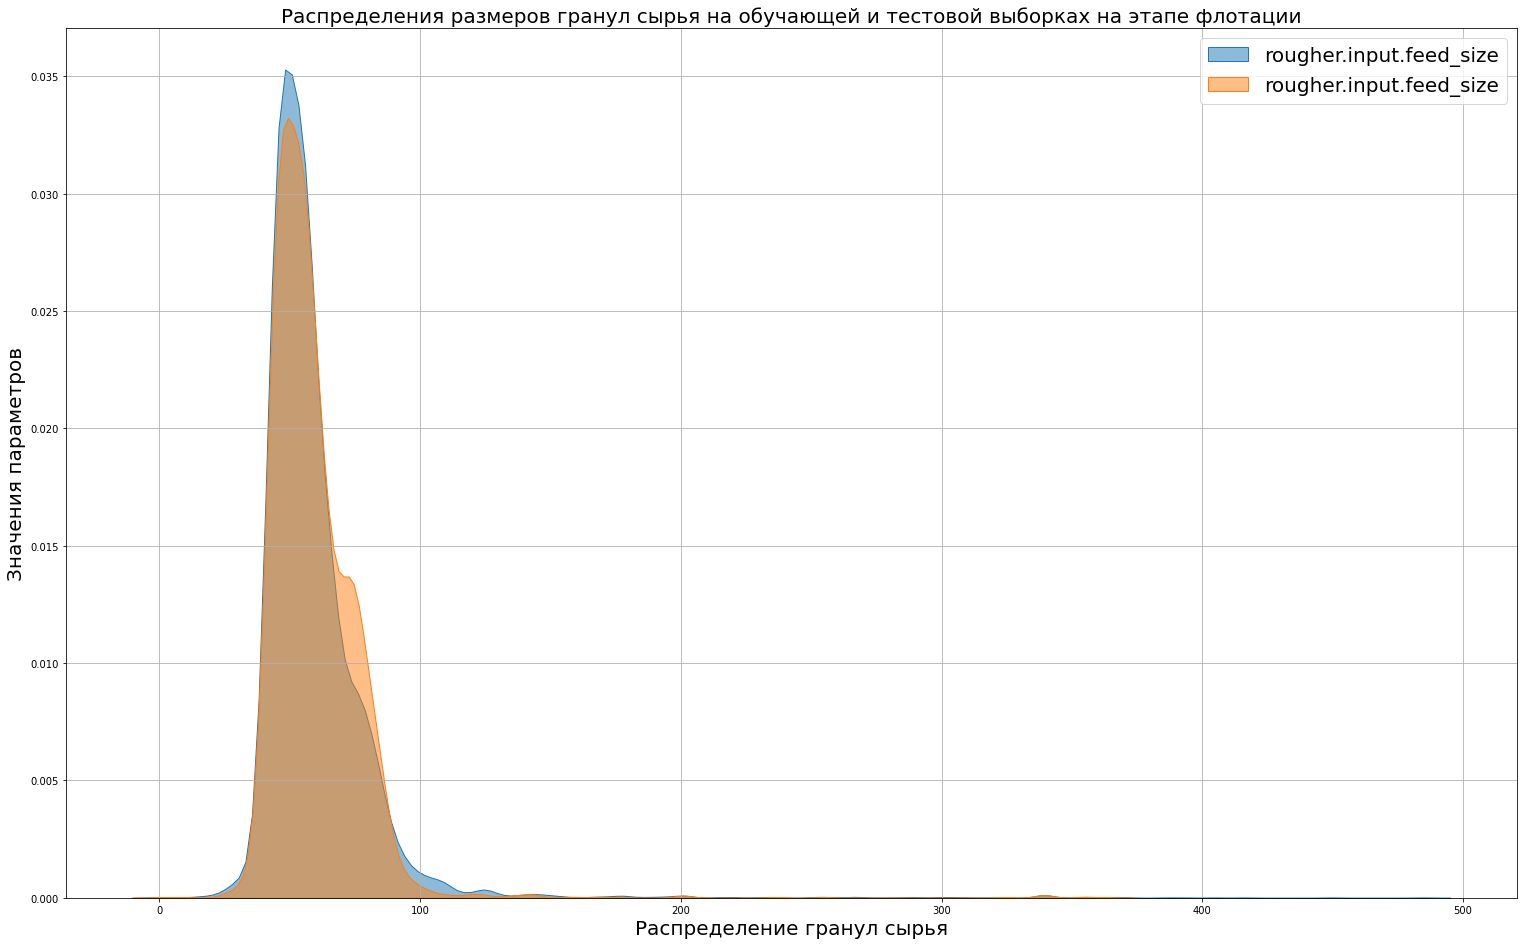

In [ ]:
plt.figure(figsize=(26,16))
plt.grid(b=True)
sns.kdeplot(data_train['rougher.input.feed_size'], x='train',fill=True, alpha=0.5, legend=True, \
            label='rougher.input.feed_size')
sns.kdeplot(data_test['rougher.input.feed_size'], x='test', fill=True, alpha=0.5, legend=True, \
            label='rougher.input.feed_size')
plt.rcParams['figure.figsize'] = (25, 15)
plt.title('Распределения размеров гранул сырья на обучающей и тестовой выборках на этапе флотации',fontsize=20);
plt.legend(fontsize=20);
plt.ylabel('Значения параметров',fontsize=20);
plt.xlabel("Распределение гранул сырья", fontsize=20);

In [ ]:
print(data_train['rougher.input.feed_size'].mean())
print(data_test['rougher.input.feed_size'].mean())

59.17172485816585
59.13615007330843


 Для представления данных используется график распределения плотности. Действительно, такое представление гораздо лучше демонстрирует распределение плотности размеров гранул на выборках на разных этапах технологического процесса.


**2.3. Исследуйте суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.**

In [ ]:
col_input=['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']
col_outp = ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']
col_primary = ['primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag',\
               'primary_cleaner.output.concentrate_pb']
col_final = ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']

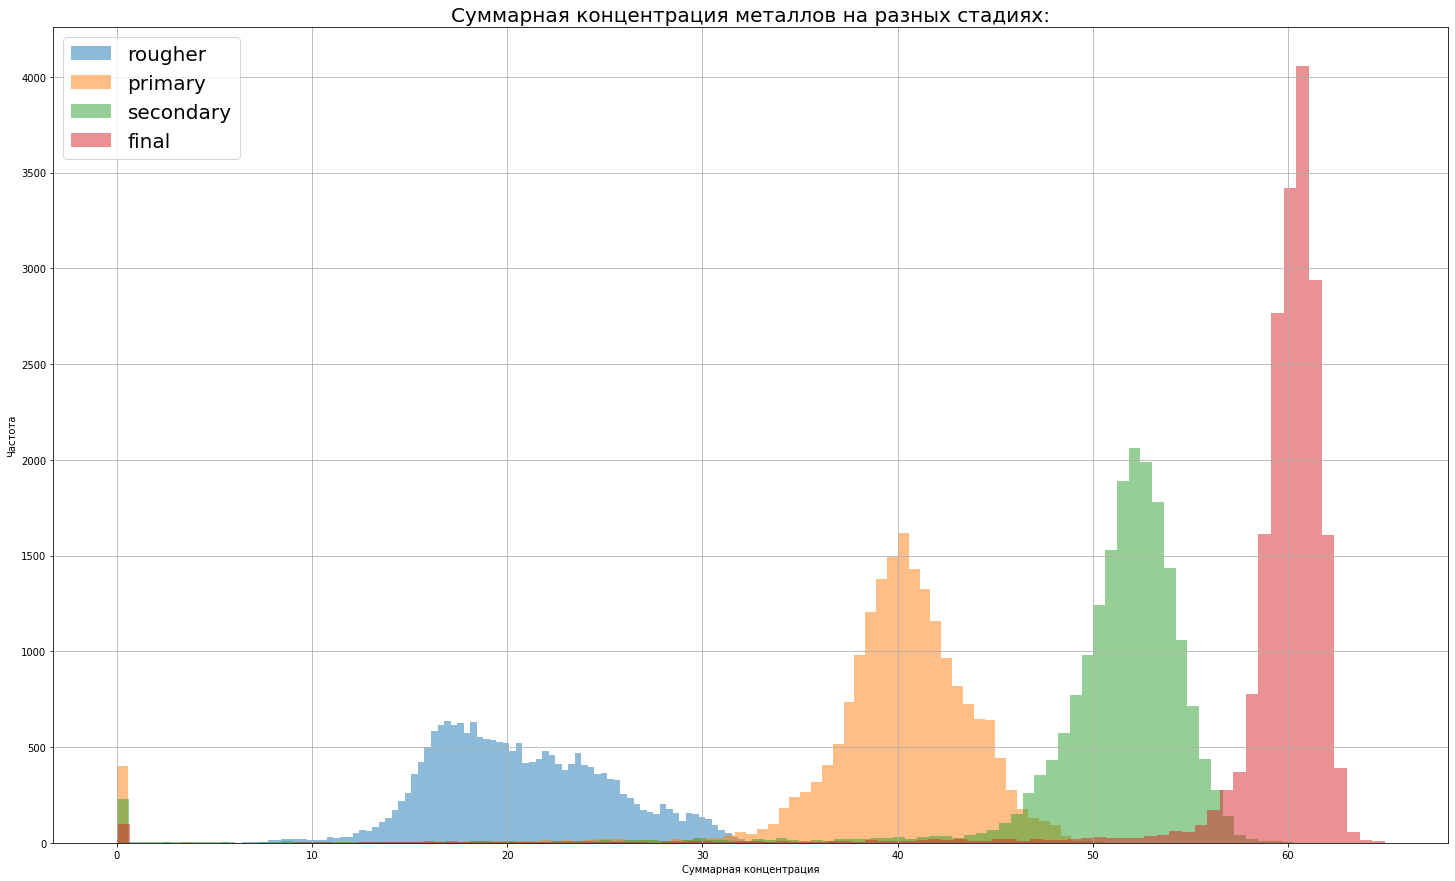

In [ ]:
concentrate_all_in = data_real['rougher.input.feed_au'] + data_real['rougher.input.feed_ag'] + \
                                                            data_real['rougher.input.feed_pb']
concentrate_all_fl = data_real['rougher.output.concentrate_au'] + data_real['rougher.output.concentrate_ag'] \
                                                            + data_real['rougher.output.concentrate_pb']
concentrate_all_pr = data_real['primary_cleaner.output.concentrate_au'] + data_real['primary_cleaner.output.concentrate_ag'] \
                                                            + data_real['primary_cleaner.output.concentrate_pb']
concentrate_all_fin = data_real['final.output.concentrate_au'] + data_real['final.output.concentrate_ag'] + \
                                                                data_real['final.output.concentrate_pb']


plt.rcParams['figure.figsize'] = (25, 15)
plt.grid(b=True)
plt.hist(concentrate_all_in, bins=100,  label='rougher',alpha=0.5)
plt.hist(concentrate_all_fl, bins=100,  label='primary', alpha=0.5)
plt.hist(concentrate_all_pr, bins=100,  label='secondary', alpha=0.5)
plt.hist(concentrate_all_fin, bins=100,  label='final', alpha=0.5)

plt.legend(fontsize=20)
plt.title('Cуммарная концентрация металлов на разных стадиях:',fontsize=20)
plt.xlabel('Суммарная концентрация')
plt.ylabel('Частота')
plt.legend(fontsize=20);

Наблюдается увеличение суммарной концентрации металлов с каждым этапом. При этом видны некоторые нулевые значения. Вероятно это выбросы.

In [ ]:
print("Суммарная концентрация металлов в сырье - ", round(concentrate_all_in.sum(),3))
print("Суммарная концентрация металлов в черновом концентрате - ", round(concentrate_all_fl.sum(), 3) )
print("Суммарная концентрация металлов в концентрате после первой очистки - ", round(concentrate_all_pr.sum(),3))
print("Суммарная концентрация металлов в финальном концентрате - ", round(concentrate_all_fin.sum(), 3))

Суммарная концентрация металлов в сырье -  401328.672
Суммарная концентрация металлов в черновом концентрате -  765372.365
Суммарная концентрация металлов в концентрате после первой очистки -  979163.515
Суммарная концентрация металлов в финальном концентрате -  1151249.918


**Выводы.**

- Концентрация золота растет с каждым этапом.
- После вторичной обработки его содержание увеличивается более чем в 5 раз. Содержание серебра увеличивается после флотации, затем снижается.
- К финальному этапу содержание серебра меньше чем в начале в полтора раза. Концентрация свинца растет от этапа к этапу. К финальному этапу содержание свинца увеличивается втрое.
- Сравнены распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Распределения практически точно совпадают, следовательно оценка модели будет правильная.

Таким образом,
  - содержание золота в финальном концентрате увеличивается более чем в пять раз по сравнению с его содержанием в сырье.
  - Уже после флотации концентрация золота вырастает в 2,4 раза.
  - После первой очистки - увеличивается в 1,5 раза.
  - К финальному этапу концентрация увеличивается в 5,4 раз.


## Модель

**3.1. Напишите функцию для вычисления итоговой sMAPE.**

Вам пригодятся формулы метрик качества:


In [ ]:
def sMAPE(y_true, y_pred):
    error = np.abs(y_true - y_pred)
    scale = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(error / scale) * 100

In [ ]:
def final_sMAPE(sMAPE_rougher, sMAPE_final):
    error = 0.25 * sMAPE_rougher + 0.75 * sMAPE_final
    return error

**3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.**

In [ ]:
#выполним разбиение на обучающие выборки по этапам
data_train_rougher_features = data_train.loc[:, data_test.columns].drop(['date'], axis=1)
data_train_rougher_targets = data_train['rougher.output.recovery']

data_train_final_features = data_train_rougher_features.copy()
data_train_final_targets = data_train['final.output.recovery']

In [ ]:
 data_train_rougher_features.head()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,-400.074028,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,-400.200179,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,-399.752729,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [ ]:
print(data_train_rougher_features.shape, data_train_rougher_targets.shape,data_train_final_features.shape, \
      data_train_final_targets.shape)

(13982, 52) (13982,) (13982, 52) (13982,)


In [ ]:
#Подготовим тестовую выборку вместе с таргетами, их подтянем из data_real по дате

data_test_targets = data_test.merge(data_real.loc[:,['date',"rougher.output.recovery","final.output.recovery"]],on = 'date')
data_test_ok = data_test_targets.loc[:,data_test.columns].drop(['date'],axis=1)

data_test_targets_rougher = data_test_targets["rougher.output.recovery"]
data_test_targets_final = data_test_targets["final.output.recovery"]

In [ ]:
model_RFR = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=12345))
model_DTR = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=12345))

In [ ]:
scorer = make_scorer(sMAPE, greater_is_better=False)

In [ ]:
# Инициализация параметров для GridSearchCV
params_RFR = {"randomforestregressor__n_estimators": range(5,100,10),
             "randomforestregressor__max_depth": range(1, 6)}
params_DTR = {"decisiontreeregressor__max_depth": range(1, 6)}

In [ ]:
grid_rougher_RFR = GridSearchCV(model_RFR,param_grid = params_RFR, scoring=scorer, n_jobs=-1, verbose=10)
grid_final_RFR = GridSearchCV(model_RFR,param_grid = params_RFR, scoring=scorer, n_jobs=-1, verbose=10)

grid_rougher_DTR = GridSearchCV(model_DTR, param_grid = params_DTR, scoring=scorer, n_jobs=-1, verbose=10)
grid_final_DTR = GridSearchCV(model_DTR, param_grid = params_DTR, scoring=scorer, n_jobs=-1, verbose=10)

In [ ]:
grid_rougher_RFR.fit(data_train_rougher_features, data_train_rougher_targets)
grid_final_RFR.fit(data_train_final_features, data_train_final_targets)

grid_rougher_DTR.fit(data_train_rougher_features, data_train_rougher_targets)
grid_final_DTR.fit(data_train_final_features, data_train_final_targets)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START randomforestregressor__max_depth=5, randomforestregressor__n_estimators=85
[CV 1/5; 1/1] END randomforestregressor__max_depth=5, randomforestregressor__n_estimators=85; total time=  33.7s
[CV 2/5; 1/1] START randomforestregressor__max_depth=5, randomforestregressor__n_estimators=85
[CV 2/5; 1/1] END randomforestregressor__max_depth=5, randomforestregressor__n_estimators=85; total time=  34.7s
[CV 3/5; 1/1] START randomforestregressor__max_depth=5, randomforestregressor__n_estimators=85
[CV 3/5; 1/1] END randomforestregressor__max_depth=5, randomforestregressor__n_estimators=85; total time=  35.1s
[CV 4/5; 1/1] START randomforestregressor__max_depth=5, randomforestregressor__n_estimators=85
[CV 4/5; 1/1] END randomforestregressor__max_depth=5, randomforestregressor__n_estimators=85; total time=  26.4s
[CV 5/5; 1/1] START randomforestregressor__max_depth=5, randomforestregressor__n_estimators=85
[CV 5/5; 1/1] 

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor(random_state=12345))]),
             n_jobs=-1,
             param_grid={'decisiontreeregressor__max_depth': range(5, 6)},
             scoring=make_scorer(sMAPE, greater_is_better=False), verbose=10)

Оптимизация параметров выполняется через поиск на range. В GridSearchCV добавлены параметры n_jobs=-1, verbose=10. Виден процесс обучения. Нагляно видно как изменяется время работы модели в завимости от подобранных параметров.

In [ ]:
print("Выбраны лучшие модели с оптимальными параметрами")
print(grid_rougher_RFR.best_estimator_, grid_rougher_DTR.best_estimator_)

Выбраны лучшие модели с оптимальными параметрами
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=5, n_estimators=85,
                                       random_state=12345))]) Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=5, random_state=12345))])


In [ ]:
best_score_rougher_RFR = abs(grid_rougher_RFR.best_score_)
best_score_final_RFR = abs(grid_final_RFR.best_score_)

best_score_rougher_DTR = abs(grid_rougher_DTR.best_score_)
best_score_final_DTR = abs(grid_final_DTR.best_score_)

In [ ]:
print("На этапе флотации:\nRandomForest ", best_score_rougher_RFR,"\nDecisionTree ", best_score_rougher_DTR)
print("\nФинальный этап:\nRandomForest ", best_score_final_RFR, "\nDecisionTree ", best_score_final_DTR)

На этапе флотации:
RandomForest  6.45305320888184 
DecisionTree  6.770693260985292

Финальный этап:
RandomForest  9.33744874188302 
DecisionTree  10.322003834916456


Посчитаем sMAPE.

In [ ]:
final_sMAPE(best_score_rougher_RFR, best_score_final_RFR)

8.616349858632724

In [ ]:
final_sMAPE(best_score_rougher_DTR, best_score_final_DTR)

9.434176191433664

RandomForest дает лучший результат. Будем использовать эту модель. Сделаем предсказания на тестовой выборке. Посчитаем sMAPE

In [ ]:
rogher_test = grid_rougher_RFR.predict(data_test_ok)

In [ ]:
final_test = grid_final_RFR.predict(data_test_ok)

In [ ]:
final_sMAPE(sMAPE(data_test_targets_rougher,rogher_test), sMAPE(data_test_targets_final,final_test))

6.527325319129649

Получили такую ошибку. Вполне приемлемо. После удаления нулевых значений и подбора новых параметров, модель значительно улучшилась.

Проверим что получится на константной модели.

In [ ]:
constant_model_rougher = DummyRegressor(strategy="median")
constant_model_final = DummyRegressor(strategy="median")

In [ ]:
constant_model_rougher.fit(data_train_rougher_features, data_train_rougher_targets)
constant_model_final.fit(data_train_final_features, data_train_final_targets)

DummyRegressor(strategy='median')

In [ ]:
constant_model_rougher_predict = constant_model_rougher.predict(data_test_ok)
constant_model_final_predict = constant_model_final.predict(data_test_ok)

In [ ]:
final_sMAPE(sMAPE(data_test_targets_rougher, constant_model_rougher_predict),sMAPE(data_test_targets_final, \
                                                                                   constant_model_final_predict))

8.294984028887791


После удаления выбросов из train модель стала давать лучшие результаты. Значение на константной медлеи получилось хуже, чем на итоговой модели.


**Выводы**

В ходе исследования по построению модели предсказывающей коэффициент восстановления золота из золотосодержащей руды выполнено следующее:
- изучены датасеты с данными:

Выявлено:</br>
- Тестовая выборка содержит на 34 столбца меньше чем две другие таблицы.
- В тестовой выборке отсутствуют данные, касающиеся выходных значений, которые будут получены в ходе выполнения технологического процесса.
- Выбрана стратегия заполнения пропусков - значением предыдущей даты.
- В данных отсутствуют явные дубликаты. Типы данных в норме, все значения количественные  -  поэтому используются модели регрессии.
- Проверена формула эффективности обогащения. Формула рассчитана верно, может использоваться. Данные, полученные по формуле сравнивались с данными из обучающей выборки. Полное совпадение до 13 знаков после запятой.
- Написаны функции для вычисления MAE. MAE посчитано - предельно низко. Что говорит о том, что средняя абсолютная разница между прогнозируемыми значениями и фактическими значениями в наборе данных предельно мала. 9.83758577644259e-15. Формулу можно использовать.
- Построены графики, которые показывают процесс роста концентрации золота от этапа к этапу. Рассчитаны количественные значения изменения концентрации золота на разных этапах, что подтверждает визуальное представление.
- Концентрация золота растет с каждым этапом. После вторичной обработки его содержание увеличивается более чем в 5 раз. Содержание серебра увеличивается после флотации, затем снижается. К финальному этапу содержание серебра меньше чем в начале в полтора раза. Концентрация свинца растет от этапа к этапу. К финальному этапу содержание свинца увеличивается втрое.
        Таким образом,
         - содержание золота в финальном концентрате увеличивается более чем в пять раз по сравнению с его содержанием в сырье.
         - Уже после флотации концентрация золота вырастает в 2,4 раза.
         - После первой очистки - увеличивается в 1,5 раза.
         - К финальному этапу концентрация увеличивается в 5,4 раз.
- Наблюдается увеличение суммарной концентрации металлов с каждым этапом. При этом видны некоторые нулевые значения.
- Рассмотрены две модели регрессии – Случайный лес и Решающее дерево.
- Модели обучены, оценено качество каждой из них кросс-валидацией.
- Выбрана лучшая модель – «Решающий лес» и проверена на тестовой выборке.

